# Data Science Project


**College/University Name**: _CICCC - Cornerstone International Community College of Canada_  
**Course**: _Machine Learning_  
**Instructor**: _Austin Egbal_  
**Student Names**: _Amir Lima Oliveira_, _Otávio Londero_, _Yuan Chan_

---

### Project Title
    _Housing Proces Competition for Kaggle Learn Users_
---

#### Objective
* Build an end-to-end pipeline with:
    - Load & Import
    - Inspect
    - Modeling with __Random Forest__ by default
    - Evaluation
    - Conclusion
---

#### Dataset Overview
- **Source:** [[Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/competitions/home-data-for-ml-course/data)]
- **Description:** Dataset of Ames housing with 80 features including property size, quality, location, and amenities to predict final sale price in dollars (target variable).
- **Credits:** DanB. Housing Prices Competition for Kaggle Learn Users. https://kaggle.com/competitions/home-data-for-ml-course, 2018. Kaggle.

---

## Table of Contents
### 1. [Import Libraries](#import-libraries)  


In [1]:
import os
import zipfile
# Packages for data manipulation
import pandas as pd
import numpy as np

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# APIs for data access
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

# Packages for machine learning
import sklearn as sk

# Packages for data preprocessing
from sklearn.preprocessing import  RobustScaler, LabelEncoder

# Data splitting, model training, evaluation
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# ML Algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier

# Data Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Optimization - Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA

# Optimization - Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_regression, chi2

# Upsampling
from imblearn.over_sampling import RandomOverSampler

random_state = 42

ModuleNotFoundError: No module named 'imblearn'

### 2. [Load & Inspect Data](#load--inspect-data)

In [83]:
# Load the original dataset in order to keep the 'SalePrice' column for the modeling phase and prediction
df_original = pd.read_csv('./data_from_kaggle/train.csv')
# Load the dataset
df = pd.read_csv('./cleaned_data/cleaned_housing_data.csv')

   - [Shape](#shape)

In [84]:
df.shape

(1460, 38)

In [85]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.893385e-17,0.137945,0.009983,0.256504,0.049658,0.575342,-0.037656,-0.246872,0.627806,0.084436,...,0.560979,0.318533,21.954110,3.409589,15.060959,2.758904,43.489041,0.107306,-0.092123,0.213284
std,5.779438e-01,0.846011,1.121595,2.465728,0.691498,1.112799,0.656585,0.557984,1.100343,0.640362,...,0.746064,0.974353,61.119149,29.317331,55.757415,40.177307,496.123024,0.901209,0.664048,0.945463
min,-1.000000e+00,-0.600000,-2.450000,-2.020380,-2.500000,-4.000000,-2.195652,-1.189189,0.000000,-0.538435,...,0.000000,-0.367647,0.000000,0.000000,0.000000,0.000000,0.000000,-1.666667,-1.000000,-1.524546
25%,-5.000000e-01,-0.600000,-0.500000,-0.475543,-0.500000,0.000000,-0.413043,-0.729730,0.000000,-0.538435,...,0.000000,-0.367647,0.000000,0.000000,0.000000,0.000000,0.000000,-0.333333,-0.500000,-0.393038
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000e-01,0.400000,0.500000,0.524457,0.500000,1.000000,0.586957,0.270270,1.000000,0.461565,...,1.000000,0.632353,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.500000,0.606962
max,1.000000e+00,2.800000,12.150000,50.831645,2.000000,4.000000,0.804348,0.432432,9.741248,7.385749,...,5.101190,7.676471,552.000000,508.000000,480.000000,738.000000,15500.000000,2.000000,1.000000,7.045522


In [86]:
df.value_counts()

Id         MSSubClass  LotFrontage  LotArea    OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold     YrSold  SalePrice
-1.000000   0.2        -0.25        -0.254076   0.5         0.0           0.652174   0.243243     1.193303     0.452790   0.0         -0.559829  -0.269652    -0.453608  1.173077  0.0            0.380070  1.0           0.0            0.0      1.0        0.0          0.0            1.0          -1.0         0.589744     0.0         0.281573   0.000000     0.529412    0.0            0.0        0.0          0.0       0.0      -1.333333   0.0     0.541506    1
 0.344757   0.2         1.40         0.673048   1.0         0.0           0.543478   

   - [Missing Values](#missing-values) <code> I'll handle those at topic __5.Feature Engineering__ </code>

In [87]:
df.isnull().sum().sort_values(ascending=False).head(20)

Id               0
WoodDeckSF       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
MSSubClass       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
HalfBath         0
FullBath         0
dtype: int64

   - [Data Types](#data-types) 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

   - [Preview Data](#preview-data)

In [89]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.000000,0.2,-0.25,-0.254076,0.5,0.0,0.652174,0.243243,1.193303,0.452790,...,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.541506
1,-0.998629,-0.6,0.50,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,...,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.220173
2,-0.997258,0.2,-0.10,0.437624,0.5,0.0,0.608696,0.216216,0.986301,0.143910,...,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.720024
3,-0.995888,0.4,-0.50,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,...,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,-0.273728
4,-0.994517,0.2,0.70,1.181201,1.0,0.0,0.586957,0.162162,2.130898,0.381186,...,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,1.035406


---

### 4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)

   - [Distribution of Variables](#distribution-of-variables)

In [90]:
categorical_features = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['int64', 'float64'])

categorical_features.shape, numerical_features.shape

((1460, 0), (1460, 38))

   - [Correlation Analysis](#correlation-analysis)

<Axes: >

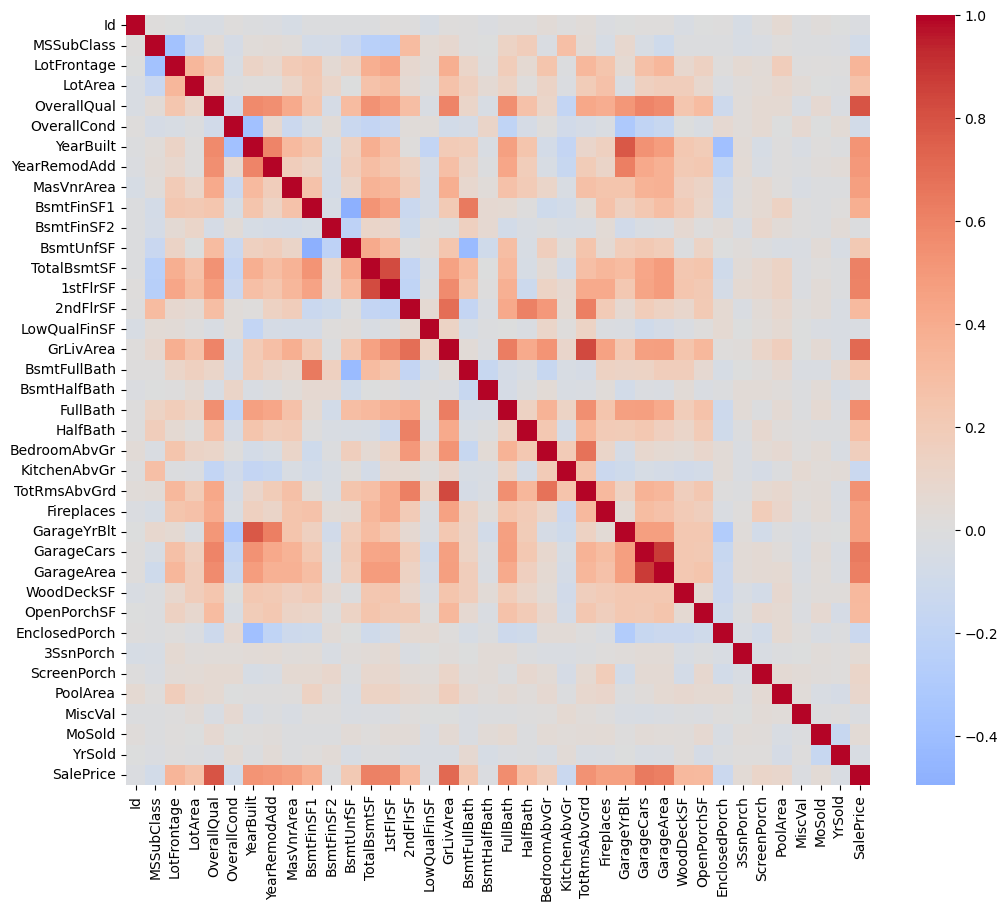

In [91]:
# Checking correlation between numerical features
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)

In [93]:
category_means = {}
for col in categorical_features.columns:
    category_means[col] = df.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    print(category_means[col].head(10))

   - [Outlier Detection](#outlier-detection)

In [94]:
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_outliers = Q1 - 1.5 * IQR
    upper_outliers = Q3 + 1.5 * IQR

    outliers = df[(df[col] < low_outliers) | (df[col] > upper_outliers)]

    print(f"Column: {col}, Outliers: {len(outliers)}")


Column: Id, Outliers: 0
Column: MSSubClass, Outliers: 103
Column: LotFrontage, Outliers: 93
Column: LotArea, Outliers: 69
Column: OverallQual, Outliers: 2
Column: OverallCond, Outliers: 125
Column: YearBuilt, Outliers: 7
Column: YearRemodAdd, Outliers: 0
Column: MasVnrArea, Outliers: 98
Column: BsmtFinSF1, Outliers: 7
Column: BsmtFinSF2, Outliers: 167
Column: BsmtUnfSF, Outliers: 29
Column: TotalBsmtSF, Outliers: 61
Column: 1stFlrSF, Outliers: 20
Column: 2ndFlrSF, Outliers: 2
Column: LowQualFinSF, Outliers: 26
Column: GrLivArea, Outliers: 31
Column: BsmtFullBath, Outliers: 1
Column: BsmtHalfBath, Outliers: 82
Column: FullBath, Outliers: 0
Column: HalfBath, Outliers: 0
Column: BedroomAbvGr, Outliers: 35
Column: KitchenAbvGr, Outliers: 68
Column: TotRmsAbvGrd, Outliers: 30
Column: Fireplaces, Outliers: 5
Column: GarageYrBlt, Outliers: 1
Column: GarageCars, Outliers: 5
Column: GarageArea, Outliers: 21
Column: WoodDeckSF, Outliers: 32
Column: OpenPorchSF, Outliers: 77
Column: EnclosedPorch

---

### 6. [Modeling / Statistical Analysis](#modeling--statistical-analysis)  

   - [Data train/test split](#Data-train-/-test-split)

In [95]:
random_state = 42
df2 = df.drop(columns=['Id', 'SalePrice'], inplace=False)
x = df2
y = df_original['SalePrice']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 36), (438, 36), (1022,), (438,))

   - [Model Selection & Training](#Model-Selection-&-Training)


 Feature Selection: Identifying and using only the most relevant features can reduce dimensionality, improve model interpretability, and potentially enhance performance and speed. Random Forest's built-in feature importance can be used for this.

In [97]:
ml_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
ml_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

max_depth: The maximum depth of each individual tree. Limiting depth can help prevent overfitting.




In [98]:
y_pred = ml_model.predict(X_test)

---

### 7. [Evaluation & Interpretation](#evaluation--interpretation)

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 17013.299322678842, MSE: 705332143.9568398, R2: 0.8989219451442428


In [100]:
cross_val_scores = cross_val_score(ml_model, x, y, cv=5, scoring='neg_mean_squared_error')
for actual, predicted in zip(y_test, y_pred):
    print(f"Original: {actual:.2f}, Predicted: {predicted:.2f}")

Original: 154500.00, Predicted: 141219.25
Original: 325000.00, Predicted: 308047.67
Original: 115000.00, Predicted: 119232.25
Original: 159000.00, Predicted: 160679.40
Original: 315500.00, Predicted: 315254.54
Original: 75500.00, Predicted: 78696.04
Original: 311500.00, Predicted: 208568.99
Original: 146000.00, Predicted: 149742.50
Original: 84500.00, Predicted: 81128.54
Original: 135500.00, Predicted: 128793.12
Original: 145000.00, Predicted: 157800.50
Original: 130000.00, Predicted: 123844.50
Original: 81000.00, Predicted: 104750.14
Original: 214000.00, Predicted: 205697.65
Original: 181000.00, Predicted: 179646.75
Original: 134500.00, Predicted: 126515.50
Original: 183500.00, Predicted: 194417.87
Original: 135000.00, Predicted: 136121.25
Original: 118400.00, Predicted: 114091.00
Original: 226000.00, Predicted: 203344.83
Original: 155000.00, Predicted: 163226.34
Original: 210000.00, Predicted: 238036.06
Original: 173500.00, Predicted: 171793.64
Original: 129000.00, Predicted: 120749.

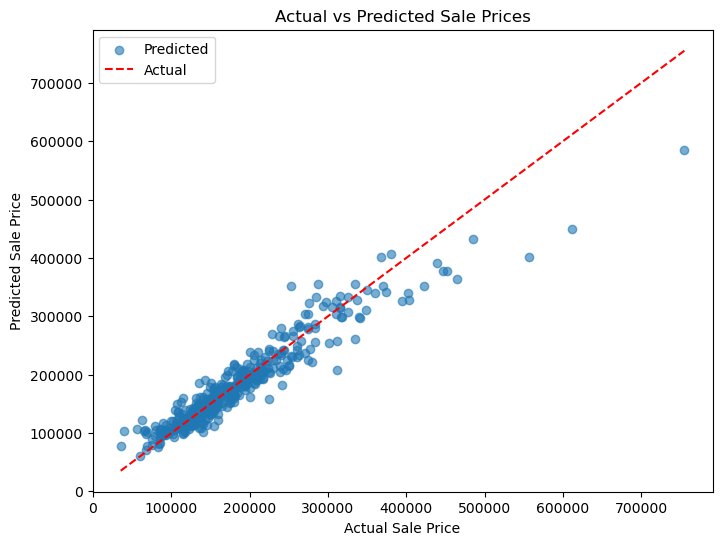

In [101]:
y_pred = ml_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.legend(['Predicted', 'Actual'])
plt.show()

### 8. [Optimization](#Optimization)

##### 8.1 [Hyperparameter tuning](#Hyperparameter_tuning)

In [102]:
# # Defining the parameters for hyperparameter tuning
# n_estimators = [i for i in range(150, 210, 1)]
# max_depth = [i for i in range(15, 21, 1)]
# max_features = ['auto', 'sqrt', 'log2']
# min_samples_split = [2, 3, 5, 7, 10]
# cv = 5

# parameters = {
#     'n_estimators': n_estimators,
#     'max_depth': max_depth,
#     'max_features': max_features,
#     'min_samples_split': min_samples_split
# }

# param_grid = RandomizedSearchCV(
#     estimator=ml_model,
#     param_distributions=parameters,
#     cv=cv,
#     random_state=random_state,
#     n_iter=30,
#     n_jobs=-1,
#     verbose=2,
#     scoring='neg_mean_squared_error'
# )

# param_grid.fit(X_train, y_train)

# y_pred_best = param_grid.predict(X_test)
# mae_best = mean_absolute_error(y_test, y_pred_best)
# mse_best = mean_squared_error(y_test, y_pred_best)
# r2_best = r2_score(y_test, y_pred_best)

# print("Best Parameters:", param_grid.best_params_)
# print(f"Best MAE: {mae_best}, Best MSE: {mse_best}, Best R2: {r2_best}")


In [130]:
ml_model_tunned = RandomForestRegressor(
    n_estimators=188,
    min_samples_split=3,
    max_features= 'auto',
    max_depth=19,
    random_state=random_state)
ml_model.fit(X_train, y_train)


ml_model_tunned.fit(X_train, y_train)
y_pred_tunned = ml_model_tunned.predict(X_test)
mae_tunned = mean_absolute_error(y_test, y_pred_tunned)
mse_tunned = mean_squared_error(y_test, y_pred_tunned)
rmse = np.sqrt(mse_tunned)
r2_tunned = r2_score(y_test, y_pred_tunned)
print(f"MAE: {mae_tunned}, MSE: {mse_tunned}, RMSE:{rmse}, R2: {r2_tunned}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 16921.070764918855, MSE: 701596244.5813657, RMSE:26487.66211996381, R2: 0.8994573204922192


In [104]:
cross_val_scores = cross_val_score(ml_model_tunned, x, y, cv=5, scoring='neg_mean_squared_error')
for actual, predicted in zip(y_test, y_pred):
    print(f"Original: {actual:.2f}, Predicted: {predicted:.2f}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1

Original: 154500.00, Predicted: 141219.25
Original: 325000.00, Predicted: 308047.67
Original: 115000.00, Predicted: 119232.25
Original: 159000.00, Predicted: 160679.40
Original: 315500.00, Predicted: 315254.54
Original: 75500.00, Predicted: 78696.04
Original: 311500.00, Predicted: 208568.99
Original: 146000.00, Predicted: 149742.50
Original: 84500.00, Predicted: 81128.54
Original: 135500.00, Predicted: 128793.12
Original: 145000.00, Predicted: 157800.50
Original: 130000.00, Predicted: 123844.50
Original: 81000.00, Predicted: 104750.14
Original: 214000.00, Predicted: 205697.65
Original: 181000.00, Predicted: 179646.75
Original: 134500.00, Predicted: 126515.50
Original: 183500.00, Predicted: 194417.87
Original: 135000.00, Predicted: 136121.25
Original: 118400.00, Predicted: 114091.00
Original: 226000.00, Predicted: 203344.83
Original: 155000.00, Predicted: 163226.34
Original: 210000.00, Predicted: 238036.06
Original: 173500.00, Predicted: 171793.64
Original: 129000.00, Predicted: 120749.

##### 8.2 [PCA](#PCA)

In [105]:
PCA = PCA(n_components=0.95, random_state=random_state)
X_train_pca = PCA.fit_transform(X_train)
X_test_pca = PCA.transform(X_test)

ml_model_pca = RandomForestRegressor(
    n_estimators=188,
    min_samples_split=3,
    max_features= 'auto',
    max_depth=19,
    random_state=random_state
    )

ml_model_pca.fit(X_train_pca, y_train)
y_pred_pca = ml_model_pca.predict(X_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)
print(f"MAE: {mae_pca}, MSE: {mse_pca}, R2: {r2_pca}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 33649.51195918705, MSE: 3294378581.0187654, R2: 0.5278970598733663


##### 8.3 [Feature selection](#Feature_selection)

In [121]:
top_corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)[1:28]
print("High Correlated Features:\n\n", top_corr)

High Correlated Features:

 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
GarageYrBlt     0.466754
BsmtFinSF1      0.386420
LotFrontage     0.349876
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
Name: SalePrice, dtype: float64


In [123]:
most_correlated_features = [top_corr.index[i] for i in range(1, 27)]
most_correlated_features[:28]

['GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'GarageYrBlt',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch']

In [124]:
X_selected = df[most_correlated_features]
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.3, random_state=random_state)

In [125]:
ml_model_feat_selec = RandomForestRegressor(
    n_estimators=188,
    min_samples_split=3,
    max_features= 'auto',
    max_depth=19,
    random_state=random_state
    )
ml_model_feat_selec.fit(X_train_selected, y_train_selected)
y_pred_feat_selec = ml_model_feat_selec.predict(X_test_selected)
mae_feat_selec = mean_absolute_error(y_test_selected, y_pred_feat_selec)
mse_feat_selec = mean_squared_error(y_test_selected, y_pred_feat_selec)
r2_feat_selec = r2_score(y_test, y_pred_pca)

print(f"MAE: {mae_feat_selec}, MSE: {mse_feat_selec}, R2: {r2_feat_selec}")

c:\Users\Dell\anaconda3\envs\machine_learning_venv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 18355.635472978927, MSE: 830120099.8549998, R2: 0.5278970598733663


##### 8.3 [Up-sampling](#Up-sampling)

###### 8.3.1 [Dataset adjustment](#Dataset_adjustment)

In [129]:
# Adding the 'SalePrice' column back to the scaled DataFrame in order to upsampling
if 'SalePrice' in df.columns:
    X_scaled = df.drop('SalePrice', axis=1)
else:
    X_scaled = df.copy()
scaled_with_target = X_scaled.copy()
scaled_with_target['SalePrice'] = df_original['SalePrice']
scaled_with_target.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.2,-0.25,-0.254076,0.5,0.0,0.652174,0.243243,1.193303,0.452790,0.0,...,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,208500
1,-0.6,0.50,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,0.0,...,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,181500
2,0.2,-0.10,0.437624,0.5,0.0,0.608696,0.216216,0.986301,0.143910,0.0,...,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,223500
3,0.4,-0.50,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,0.0,...,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,140000
4,0.2,0.70,1.181201,1.0,0.0,0.586957,0.162162,2.130898,0.381186,0.0,...,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,250000


In [ ]:
ros = RandomOverSampler(random_state=random_state, sampling_strategy='auto')
X_upsampled, price_cat_upsampled = ros.fit_resample(scaled_with_target, price_categories)

---

### 9. [Conclusions](#conclusions)

---